**code for feature extraction of FEATURES**

Spectral features are extracted. This takes very long for multiple files.

In [2]:
%load_ext autoreload
%autoreload 2
#required packages
import os
import glob
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pickle
from datetime import datetime
#my funcs
from ecog_functions import *


In [5]:
#set path of recordings, rats and days
DATA_PATH = r"C:\Users\marty\Documents\DATA\water_soluble_cbn_sleep\*\timestamped\*.txt"
rats=['\\11\\','\\12\\','\\13\\','\\14\\','\\16\\']
days=['20232805','20232905','20233005','20233105']
#paths where features are stored
FEATURE_PATH = r'C:\Users\marty\Projects\sleep_new\res_temp\*'

In [2]:
#read paths - here set where DATA should be read from
paths = glob.glob(DATA_PATH)

In [33]:
#selects each rat
sel_paths=[]
for rat in range(0,len(rats)):
    print(str(rats[rat])+' start')
    for day in range(0,len(days)):
        print(str(days[day])+' start')
        sel_paths = [p for p in paths if days[day] in p and rats[rat] in p]
        #this function can be found in ecog_functions.py
        final_features=path_to_feature(sel_paths)
        pickle.dump(final_features, open('./res_temp/'+str(rats[rat].strip('\\'))+'_'+str(days[day])+'.pkl','wb'))
        print(str(rats[rat])+'_'+str(days[day])+' done')


\11\ start
20232805 start
C:\Users\marty\Documents\DATA\water_soluble_cbn_sleep\11\timestamped\202328050107.txt
data read complete
data filtering complete
[0.84632264 0.15367736]
features extracted
C:\Users\marty\Documents\DATA\water_soluble_cbn_sleep\11\timestamped\202328050128.txt
data read complete
data filtering complete
[0.89924148 0.10075852]
features extracted
C:\Users\marty\Documents\DATA\water_soluble_cbn_sleep\11\timestamped\202328050207.txt
data read complete
data filtering complete
[0.91415825 0.08584175]
features extracted
C:\Users\marty\Documents\DATA\water_soluble_cbn_sleep\11\timestamped\202328050228.txt
data read complete
data filtering complete
[0.95233221 0.04766779]
features extracted
C:\Users\marty\Documents\DATA\water_soluble_cbn_sleep\11\timestamped\202328050307.txt
data read complete
data filtering complete
[0.90651449 0.09348551]
features extracted
C:\Users\marty\Documents\DATA\water_soluble_cbn_sleep\11\timestamped\202328050328.txt
data read complete
data filt

In [6]:
feat_paths=glob.glob(FEATURE_PATH)[:-3]

In [7]:
#load features for examination
final_features=[]
for path in feat_paths:
    final_features.append(pickle.load(open(path,'rb')))
final_features=pd.concat(final_features)

<AxesSubplot: >

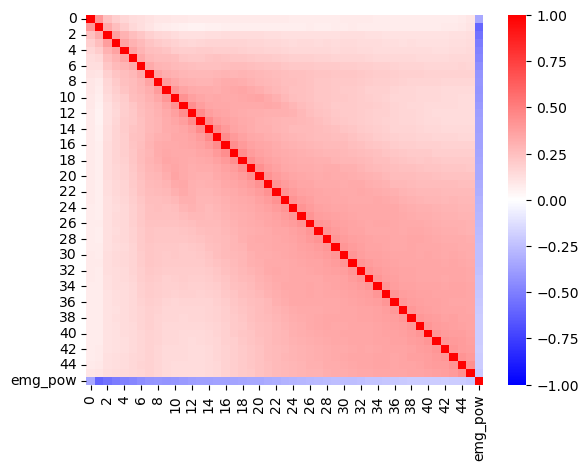

In [8]:
#plot correlation
corr=final_features.corr()
sns.heatmap(corr, cmap='bwr', vmin=-1, vmax=1)

C:\Users\marty\AppData\Local\Temp\ipykernel_6748\581387079.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(0, len(final_features[feature][2000:5600])),final_features[feature][2000:5600])


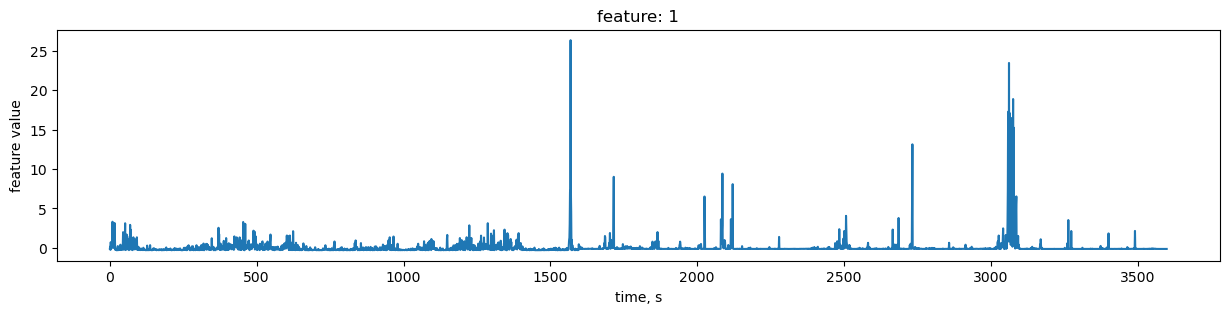

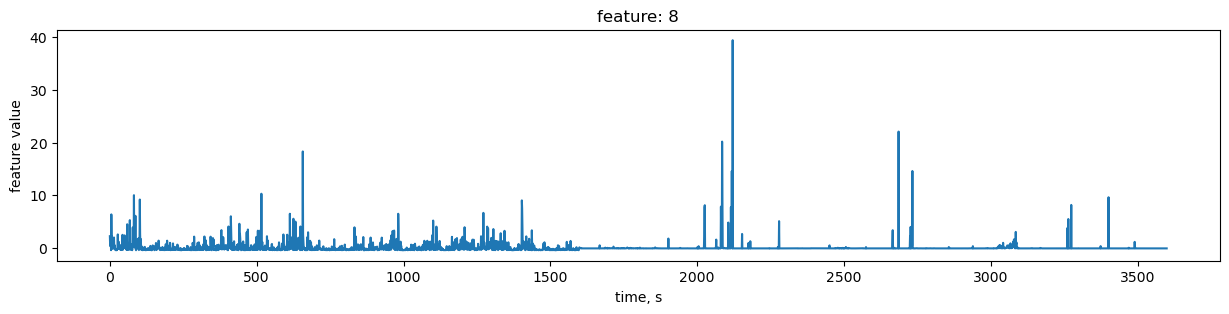

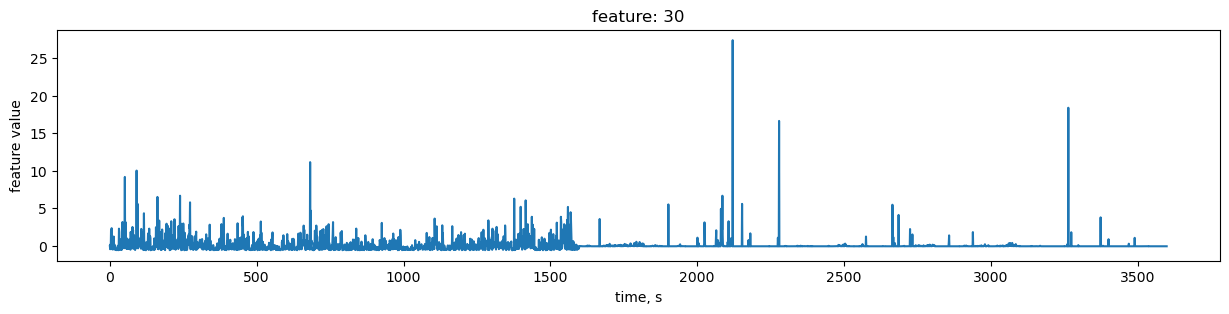

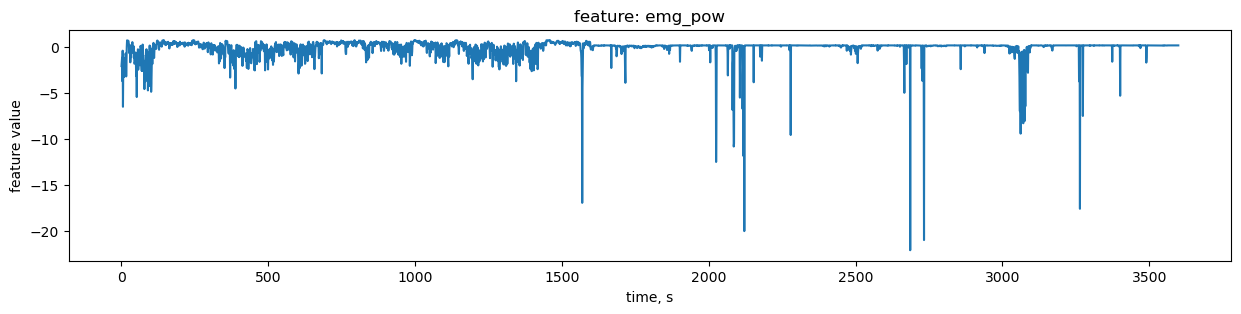

In [9]:
# plotting selected features for examination - one hour
to_plot=['1','8','30','emg_pow']
for feature in to_plot:
    plt.figure(figsize=(15,3))
    plt.plot(np.arange(0, len(final_features[feature][2000:5600])),final_features[feature][2000:5600])
    plt.ylabel('feature value')
    plt.xlabel('time, s')
    plt.title('feature: '+feature)